# SPRINT1:Data preprocessing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
# The above are required libraries

In [2]:
games = pd.read_excel(r'games.xlsx')
appearance = pd.read_excel(r'appearances.xlsx')
games_events = pd.read_excel(r'game_events.xlsx')
games_line = pd.read_excel(r'game_lineups.xlsx')
players = pd.read_excel(r'players.xlsx')
# Loading the excels as dataframes 

In [3]:
df = appearance.merge(players,on='player_id',how='inner')
df1 = df.merge(games_events,on='game_id',how='inner')
df2= df1.merge(games,on='game_id',how='inner')
df3= pd.merge(df2,games_line,on='player_name',how='inner')
# the data is meraged by inner join of different dataframes with common columns and converted in one final dataframe

In [4]:
duplicate_columns = ['player_id_x','player_id_y','date_x','date_y']
for i in duplicate_columns:
    df3.drop(columns=[i],inplace=True)
print(df3.columns)
# After merge the duplicate columns in dataframe are remove by using drop function 

Index(['appearance_id', 'game_id_x', 'player_name', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position_x',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'game_event_id', 'minute', 'type_x', 'description', 'player_in_id',
       'player_assist_id', 'competition_id_y', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'game_lineups_id',
       'game_id_y', 'type_y', 'number', 'player_id', 'team_captain',
       'position_y'],
   

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                4199 non-null   object        
 1   game_id_x                    4199 non-null   int64         
 2   player_name                  4199 non-null   object        
 3   competition_id_x             4199 non-null   object        
 4   yellow_cards                 4199 non-null   int64         
 5   red_cards                    4199 non-null   int64         
 6   goals                        4199 non-null   int64         
 7   assists                      4199 non-null   int64         
 8   minutes_played               4199 non-null   int64         
 9   name                         4199 non-null   object        
 10  last_season                  4199 non-null   int64         
 11  current_club_id              4199 non-null 

In [6]:
df3.drop(columns=['home_club_formation'],inplace= True)
df3.drop(columns=['away_club_formation'],inplace= True)    
# Remove unwanted columns becaues they no data present in them fully null columns

In [7]:
import warnings
warnings.filterwarnings('ignore')
for col in df3:
    if df3[col].dtypes == 'object':
        df3[col].fillna(df3[col].mode()[0],inplace=True)
    else:
        df3[col].fillna(df3[col].median(),inplace=True)
print(df3.duplicated())
# filling the missing values in dataframe numerical columns with median and categorical with mode of the particular column and no duplicated values in df3

0       False
1       False
2       False
3       False
4       False
        ...  
4194    False
4195    False
4196    False
4197    False
4198    False
Length: 4199, dtype: bool


In [8]:
df3.to_csv('Football_data_merged_Cleaned.csv',index=False)

football = pd.read_csv(r'Football_data_merged_Cleaned.csv')
football
# Saving our final cleaned data set to csv file call football merged and cleaned file

,appearance_id,game_id_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,name,...,away_club_name,aggregate,competition_type,game_lineups_id,game_id_y,type_y,number,player_id,team_captain,position_y
0,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,49723,0,Right-Back
1,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,49723,0,Right-Back
2,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,49723,0,Right-Back
3,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,49723,0,Right-Back
4,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,49723,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,26085977dac1dc934abb39888f128636,4120867,substitutes,11,537467,0,Centre-Forward
4195,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,537467,0,Centre-Forward
4196,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,537467,0,Centre-Forward
4197,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,537467,0,Centre-Forward


# SPRINT3

# Perfromance analysis

# What is the probability of a player being both a team captain and scoring a goal in a match?

In [11]:
captain_and_goal = football[(football['team_captain'] == 1) & (football['goals'] > 0)]
joint_prob_goals = len(captain_and_goal) / len(football)
print(joint_prob_goals)
# The probability of a player being both a team captain and scoring a goal in a match is 0.0.There might not be any players in the dataset who were team captains and scored goals in the same match.

0.0


# What is the probability that a player is a team captain and played more than 60 minutes in a match?

In [14]:
captain_and_minutes = football[(football['team_captain'] == 1) & (football['minutes_played'] > 60)]
joint_prob_minutes = len(captain_and_minutes) / len(football)
goals_scored = football[football['goals'] >= 1]
conditional_prob_minutes_given_goals = len(goals_scored[goals_scored['minutes_played'] > 60]) / len(goals_scored)
print(conditional_prob_minutes_given_goals)
#player scored at least one goal, the probability that they played more than 60 minutes is 0.8012 

0.8012461059190031


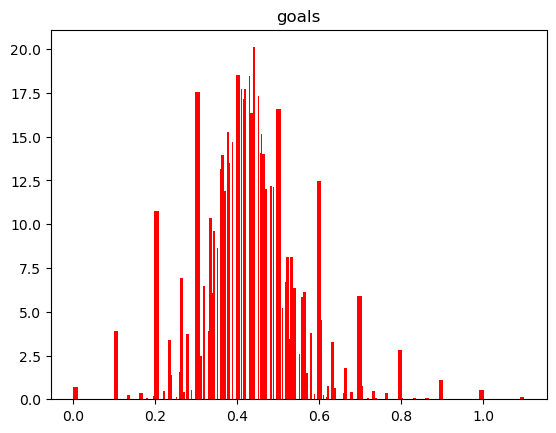

In [16]:
# central limit theoream
# Sampling distributions of the mean goals scored
data = football['goals']
samplesize = [10, 30, 50, 100]
numsample=2500

for i,j in enumerate(samplesize):
    samplemean=[]
    for i in range(numsample):
        sample = data.sample(n=j,replace = True)
        samplemean.append(np.mean(sample))
    plt.hist(samplemean,bins=100,color='red',density=True)
    plt.title('goals')
 
plt.show()
# The histogram demonstrates that the sample means of goals follow a normal distribution, 
# confirming the Central Limit Theorem and indicating consistency in average goal performance across samples.

In [23]:
test = pd.read_excel(r'test data.xlsx')
test.columns

Index(['Unnamed: 0', 'appearance_id', 'game_id', 'player_id', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name', 'team_captain', 'position_y'],
      dtype='object')

In [24]:
test

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


# SPRINT 4

# Performance Analysis:LogisticRegression for Classifcation

In [62]:
# Can a regression model predict team performance based on historical player data like good or bad?

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
d=['appearance_id', 'game_id_x', 'player_id', 'competition_id_x','yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played','season', 'round', 'home_club_goals', 'away_club_goals','home_club_position', 'away_club_position', 'home_club_manager_name','away_club_manager_name', 'stadium', 'attendance', 'referee','home_club_name', 'away_club_name', 'aggregate', 'competition_type','game_event_id', 'date', 'minute', 'type_x', 'player_in_id', 'name','last_season', 'current_club_id', 'player_code', 'country_of_birth','date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm','market_value_in_eur', 'highest_market_value_in_eur','contract_expiration_date', 'game_lineups_id', 'type_y', 'number','player_name', 'team_captain', 'position_y']
data = football.loc[:,d]
data.insert(len(df.columns), 'perfromance', value=np.nan)
data.loc[data['goals']>0,'perfromance']= 'Good'
data.loc[data['goals']==0,'perfromance']= 'Bad'
data
# The new label data feature inserted perfromance based on goals scored by players 

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,26085977dac1dc934abb39888f128636,substitutes,11,Joseph Efford,0,Centre-Forward
4195,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,eadce2f0ce9f400d0561a8c05453d702,substitutes,28,Joseph Efford,0,Centre-Forward
4196,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,bc79183aa9a1ffacb14cc733f6143411,substitutes,28,Joseph Efford,0,Centre-Forward
4197,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,e16817800f83daf7bad1ddabf58316b7,substitutes,28,Joseph Efford,0,Centre-Forward


In [26]:
data.perfromance

0        Bad
1        Bad
2        Bad
3        Bad
4        Bad
        ... 
4194    Good
4195    Good
4196    Good
4197    Good
4198    Good
Name: perfromance, Length: 4199, dtype: object

In [27]:
import warnings
warnings.filterwarnings("ignore")
lb = preprocessing.LabelEncoder()
for i in data:
    if data[i].dtypes=='object':
        data[i]=lb.fit_transform(data[i])
mm = preprocessing.MinMaxScaler()
newdata = pd.DataFrame(mm.fit_transform(data), columns=data.columns)
newdata
# The labelencoder used to convert object to numerical data type 
# The feature engneering is perfromed by minmaxscalar on all features so the columns dont affect other columns

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,0.002538,0.000021,0.000000,0.705882,0.0,0.0,0.000000,0.0,0.579832,0.0,...,0.652174,0.016194,0.077181,0.25,0.502646,1.0,0.206186,0.869565,0.0,1.000000
1,0.002538,0.000021,0.000000,0.705882,0.0,0.0,0.000000,0.0,0.579832,0.0,...,0.652174,0.016194,0.077181,0.25,0.820106,1.0,0.206186,0.869565,0.0,1.000000
2,0.002538,0.000021,0.000000,0.705882,0.0,0.0,0.000000,0.0,0.579832,0.0,...,0.652174,0.016194,0.077181,0.25,0.211640,1.0,0.206186,0.869565,0.0,1.000000
3,0.002538,0.000021,0.000000,0.705882,0.0,0.0,0.000000,0.0,0.579832,0.0,...,0.652174,0.016194,0.077181,0.25,0.756614,1.0,0.206186,0.869565,0.0,1.000000
4,0.002538,0.000021,0.000000,0.705882,0.0,0.0,0.000000,0.0,0.579832,0.0,...,0.652174,0.016194,0.077181,0.25,0.105820,1.0,0.206186,0.869565,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,0.989848,0.971029,0.984928,0.000000,0.0,0.0,0.333333,0.0,0.638655,1.0,...,0.217391,0.000000,0.003356,0.50,0.116402,1.0,0.092784,0.478261,0.0,0.333333
4195,0.989848,0.971029,0.984928,0.000000,0.0,0.0,0.333333,0.0,0.638655,1.0,...,0.217391,0.000000,0.003356,0.50,0.899471,1.0,0.268041,0.478261,0.0,0.333333
4196,0.989848,0.971029,0.984928,0.000000,0.0,0.0,0.333333,0.0,0.638655,1.0,...,0.217391,0.000000,0.003356,0.50,0.708995,1.0,0.268041,0.478261,0.0,0.333333
4197,0.989848,0.971029,0.984928,0.000000,0.0,0.0,0.333333,0.0,0.638655,1.0,...,0.217391,0.000000,0.003356,0.50,0.862434,1.0,0.268041,0.478261,0.0,0.333333


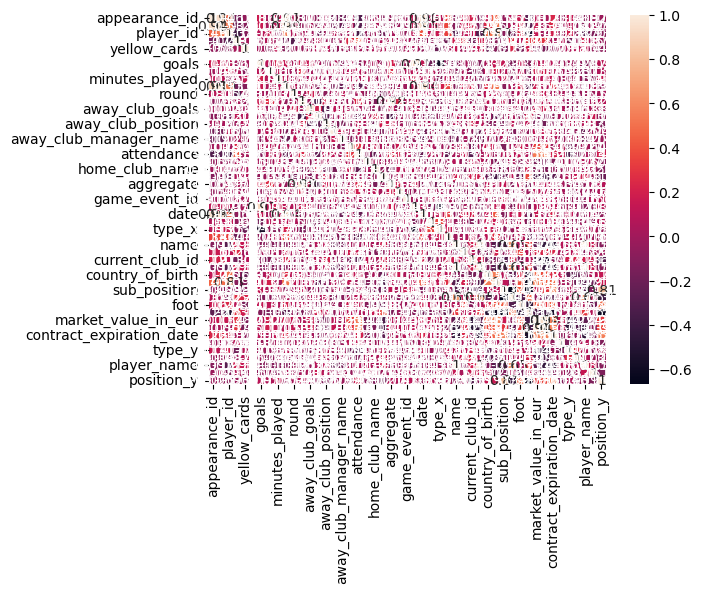

perfromance                    1.000000
goals                          0.912404
minutes_played                 0.174054
aggregate                      0.161419
home_club_goals                0.141942
date_of_birth                  0.125650
game_id_x                      0.121473
appearance_id                  0.115535
foot                           0.112939
sub_position                   0.108919
season                         0.107687
contract_expiration_date       0.102720
away_club_goals                0.102416
player_id                      0.097291
highest_market_value_in_eur    0.096144
assists                        0.093371
date                           0.091123
market_value_in_eur            0.086682
position_y                     0.080237
home_club_name                 0.069896
round                          0.067964
stadium                        0.049532
home_club_manager_name         0.042509
yellow_cards                   0.026920
country_of_birth               0.019548


In [28]:
plt.figsize=(40,40)
sb.heatmap(newdata.corr(),annot=True)
plt.show()
print(newdata.corr()['perfromance'].sort_values(ascending=False))

In [29]:
X = newdata.loc[:, ['home_club_goals','market_value_in_eur','attendance']]
Y = data['perfromance']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)
LG=LogisticRegression().fit(x_train,y_train)
from sklearn.metrics import accuracy_score
pred=LG.predict(x_test)
accuracy_score(pred,y_test)
# The home goals,market values,attendence are final feature and our mode as an accuracy of 65%

0.6531746031746032

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()
print(tn,fp,fn,tp)
from sklearn.metrics import recall_score
print(recall_score(y_test,pred))
from sklearn.metrics import precision_score
print(precision_score(y_test,pred))
from sklearn.metrics import f1_score
print(f1_score(y_test,pred))
# The true negative is 683,false positive are 94,false negative are 340,true positive are 143

[[709  85]
 [352 114]]
709 85 352 114
0.2446351931330472
0.5728643216080402
0.34285714285714286


# SPRINT5

# Player Profile and Market Value:simple linear regression 

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# The required libraries

# Can we predict a player's transfer fee using a simple regression model based on their recent performance stats?

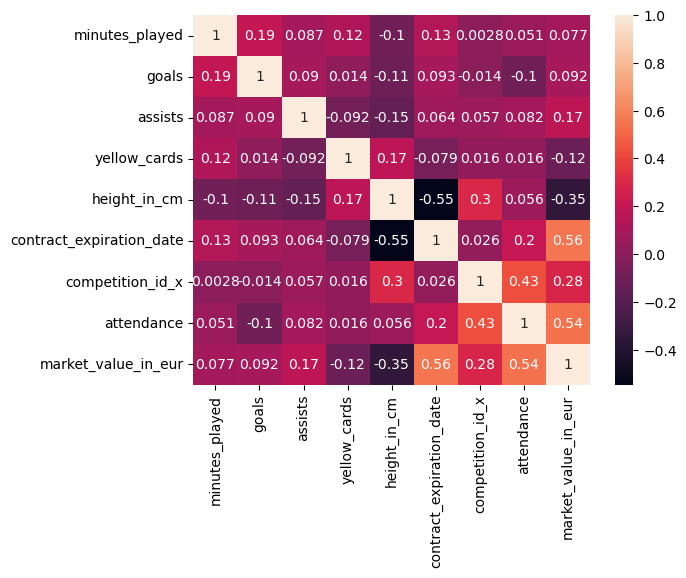

market_value_in_eur            1.000000
highest_market_value_in_eur    0.942259
date_of_birth                  0.567084
contract_expiration_date       0.558375
attendance                     0.540897
country_of_birth               0.480305
foot                           0.408825
stadium                        0.341812
position_y                     0.307984
competition_id_x               0.284576
last_season                    0.225322
assists                        0.173370
season                         0.163262
sub_position                   0.156597
away_club_goals                0.153247
game_id_x                      0.146893
date                           0.146267
player_id                      0.141507
game_lineups_id                0.136492
round                          0.129144
minute                         0.113636
appearance_id                  0.104907
home_club_manager_name         0.095198
goals                          0.091893
perfromance                    0.086682


In [69]:
d = newdata.loc[:,['minutes_played', 'goals', 'assists', 'yellow_cards', 'height_in_cm','contract_expiration_date','competition_id_x','attendance','market_value_in_eur']]
# plt.figsize=(40,40)
sb.heatmap(d.corr(),annot=True)
plt.show()
print(newdata.corr()['market_value_in_eur'].sort_values(ascending=False))

In [33]:
X = data[["goals"]]
y= data['market_value_in_eur']


# Predicition
predict = LG.predict(x_test)
# comparing actualvalue and predicted value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
import math
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
# print('MSE:',MSE)
print('RMSE:',round(RMSE,2))
print('MAE:',round(MAE,2))
print('R2:',round(R2,2))

# The simple linear regression model predicts the transfer fee of player the feature is considered on base of correleation 
# The has  mean absolute error of 2550414.

RMSE: 3675660.63
MAE: 2550414.01
R2: 0.89


# How do player attributes correlate with their market value using multilinear regression?

In [34]:
X = newdata.loc[:,['minutes_played', 'goals', 'assists', 'yellow_cards', 'height_in_cm']]

y= data[['market_value_in_eur']]


# Predicition
predict = LG.predict(x_test)
# comparing actualvalue and predicted value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
import math
RMSE = math.sqrt(mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
# print('MSE:',MSE)
print('RMSE:',RMSE)
print('MAE:',MAE)
print('R2:',R2)
# The above multiple linear regression model predicts the market value of player from their attirbutes or features
# Features selected using multicolinearity 'minutes_played', 'goals', 'assists', 'yellow_cards', 'height_in_cm' 


RMSE: 10214895.26767451
MAE: 9247678.854915077
R2: 0.11594038072193869


# SPRINT6:Team Comparison:

# Is there a significant difference in the average number of goals scored by home clubs compared to away clubs?

In [35]:
da = pd.DataFrame(football.groupby('away_club_name')['goals'].count())
da
# Exteacting data of away club average goals using grouby and converting in dataframe for east access

,goals
away_club_name,
1. FC Koin,15
1. FC Union Berlin,15
1. FSV Mainz 05,32
1.FC Nuremberg,42
AC Horsens,51
...,...
Willem II Tilburg,2
Wolverhampton Wanderers Football Club,14
bayer 04 leverkusen Football,68


In [36]:
da1 = pd.DataFrame(football.groupby('home_club_name')['goals'].count())
da1
# Exteacting data of home club average goals using grouby and converting in dataframe for east access

,goals
home_club_name,
Lille Olympique Sporting Club,10
1. FC Koln,41
1. FSV Mainz 05,33
1.FC Nuremberg,116
AC Horsens,28
...,...
Yellow-Red Koninklijke Voetbalclub Mechelen,8
club atletico de madrid sad,14
spvgg greuther furth games,28


In [37]:
import math
from scipy.stats import t
a1 = da.sample(10,replace=False)
a2 = da1.sample(10,replace=False)
alpha = 0.05

In [38]:
x1 = a1['goals'].values
x2 = a2['goals'].values
n1 = 10
n2=10
df=10+10-2
x1_mean=np.mean(x1)
x2_mean=np.mean(x2)
x1_std=np.std(x1)
x2_std=np.std(x2)
a=(𝑥1_mean- 𝑥2_mean)
d=math.sqrt((x1_std**2*(n1 -1) + x2_std**2*(n2-1))/df)*(math.sqrt(1/n1 + 1/n2))
T_stat = a/d
print(T_stat)
t_critical = t.ppf((1-alpha/2),df)
print(t_critical)
pval= t.sf(abs(T_stat),df)
print(pval)

0.8918246571152398
2.10092204024096
0.19212701715797847


In [39]:


if pval<alpha and T_stat>t_crit:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')
# The above two tailed test is perfromed as the sample size was less than 30 and pval is less then aplha so nulll hypothesis is accepted

Accept null hypothesis


# SPRINT7:Attendance and Stadium Analysis:

# How can KNN classification be used to classify stadium attendance levels (high, medium, low) based on match-specific, team-related, and external factors?

In [40]:
data1 = football
data1

,appearance_id,game_id_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,name,...,away_club_name,aggregate,competition_type,game_lineups_id,game_id_y,type_y,number,player_id,team_captain,position_y
0,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,49723,0,Right-Back
1,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,49723,0,Right-Back
2,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,49723,0,Right-Back
3,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,49723,0,Right-Back
4,2231426_49723,2231426,Timothy Chandler,L1,0,0,0,0,70,Timothy Chandler,...,eintracht frankfurt Football ag,01:02:00,domestic_league,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,49723,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,26085977dac1dc934abb39888f128636,4120867,substitutes,11,537467,0,Centre-Forward
4195,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,537467,0,Centre-Forward
4196,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,537467,0,Centre-Forward
4197,3415291_537467,3415291,Joseph Efford,BE1,0,0,1,0,77,Joseph Efford,...,SK Beveren,03:02:00,domestic_league,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,537467,0,Centre-Forward


In [41]:
data1.insert(len(data1.columns),'attendance%',value=np.nan)
data1.loc[data1['attendance']>=50000,'attendance%']='high'
data1.loc[(data1['attendance']>20000)&(data1['attendance']<50000),'attendance%']='medium'
data1.loc[data1['attendance']<=20000,'attendance%']='low'

# The label column is added to the data as attendence percentage as high,low,medium depending on attendence 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
lb = preprocessing.LabelEncoder()
for i in data1:
    if data1[i].dtypes=='object':
        data1[i]=lb.fit_transform(data1[i])

# X = data1.drop('attendance%', axis=1)
X= data1.loc[:,['season', 'round', 'date','home_club_goals', 'away_club_goals', 'home_club_position','away_club_position', 'home_club_manager_name','away_club_manager_name', 'stadium', 'attendance']]
y = data1['attendance%']
# Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)
# The data is loaded by importing required libararies and perfromed feature engneering using standard scalar and splited in train test split.

In [43]:
from sklearn.model_selection import cross_val_score

# Find the optimal k using cross-validation
k_values = range(1, 15)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")
# The optimal k value is 1 for our model calculated using cross validation score

The optimal number of neighbors is 1


In [44]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print("F1 Score:", f1_score(pred, y_test, average='macro'))
# The model is good in classifing the attedence in hig,medium,low 
# The accuracy of model is 0.988

0.9857142857142858
[[330   0   1]
 [  0 460  11]
 [  2   4 452]]
F1 Score: 0.9866365186002802


In [45]:
from sklearn.metrics import recall_score
print(recall_score(pred, y_test, average='macro'))
# The recall value is 0.988

0.986841283508895


# SPRINT9

# Is there a statistically significant difference in the average number of critical events (e.g., goals, red cards, substitutions) occurring during home matches compared to away matches?"

In [46]:
homeclub_events=pd.DataFrame(football.groupby('home_club_name')['type_x'].count())
awayclub_events=pd.DataFrame(football.groupby('away_club_name')['type_x'].count())
# Extracting data into home and awayclub typex include all goal,redcards,substitutions etc)

In [47]:
homeclub_events

,type_x
home_club_name,
0,10
1,41
2,33
3,116
4,28
...,...
101,8
102,14
103,28


In [48]:
# Null Hypothesis (H₀): The average number of critical events is the same for home and away matches. mu(away)=mu(away)
# Alternative Hypothesis (H₁):The average number of critical events is different for home and away matches. mu(away)!=mu(away)

In [49]:
a1 = homeclub_events.sample(10,replace=False)
a2 = awayclub_events.sample(10,replace=False)
alpha = 0.05
x1 = a1['type_x']
x2 = a2['type_x']
n1 = 10
n2=10
df=10+10-2
x1_mean=np.mean(x1)
x2_mean=np.mean(x2)
x1_std=np.std(x1)
x2_std=np.std(x2)
a=(𝑥1_mean- 𝑥2_mean)
d=math.sqrt((x1_std**2*(n1 -1) + x2_std**2*(n2-1))/df)*(math.sqrt(1/n1 + 1/n2))
T_stat = a/d
print(T_stat)
t_critical = t.ppf((alpha/2),df)
print(t_critical)
pval= t.sf(abs(T_stat),df)
print(pval)

0.5253005872408006
-2.10092204024096
0.302892616487854


In [50]:

if pval<alpha and T_stat>t_crit:
  print('Reject null hypothesis')
else:
  print('Accept null hypothesis')
# The null hypothesis is accepted as pvalue is greater than alpha. The average number of critical events is the same for home and away matches

Accept null hypothesis


# SPRINT10 : Player Attributes and Demographics

In [51]:
correlation = data['height_in_cm'].corr(data['market_value_in_eur'])
correlation

-0.34585115525683385

# How can players be clustered based on performance metrics (e.g., goals, assists, minutes played) to identify high performers, average players, and underperformers?

In [64]:
data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,26085977dac1dc934abb39888f128636,substitutes,11,Joseph Efford,0,Centre-Forward
4195,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,eadce2f0ce9f400d0561a8c05453d702,substitutes,28,Joseph Efford,0,Centre-Forward
4196,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,bc79183aa9a1ffacb14cc733f6143411,substitutes,28,Joseph Efford,0,Centre-Forward
4197,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,176.0,300000.0,600000.0,2026-06-30,e16817800f83daf7bad1ddabf58316b7,substitutes,28,Joseph Efford,0,Centre-Forward


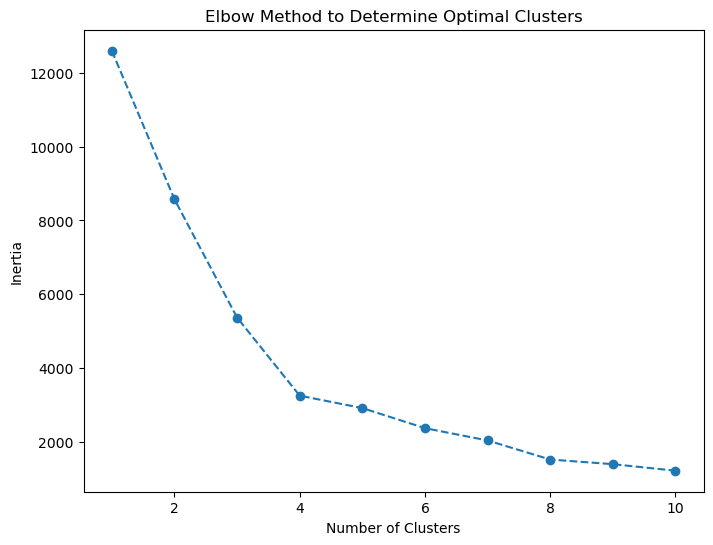

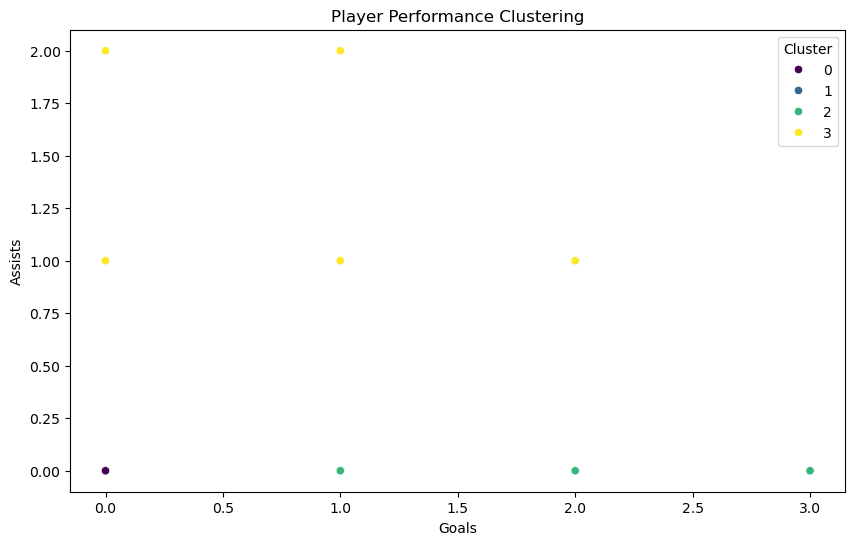

In [67]:

from sklearn.cluster import KMeans
# Select relevant features for performance clustering
features = ['goals', 'assists', 'minutes_played']
performance_data = data[features]
# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(performance_data)
# Determine the optimal number of clusters using the Elbow method
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
# Apply K-Means with an optimal number of clusters (e.g., 3)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
performance_data['Cluster'] = kmeans.fit_predict(normalized_data)
# Visualize clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(
    x=performance_data['goals'],
    y=performance_data['assists'],
    hue=performance_data['Cluster'],
    palette='viridis'
)
plt.title('Player Performance Clustering')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.legend(title='Cluster')
plt.show()

# The above knn clustering model the optimal cluster is 4 form elbow method the cluster are divied in four groups 0,1,2,3

In [ ]:
# The K-means clustering model effectively groups players into four distinct performance categories based on their contributions to goals and assists.

In [53]:
g_ds = df3.loc[:,['player_name','foot', 'height_in_cm', 'market_value_in_eur','contract_expiration_date','goals','date_of_birth', 'sub_position', 'assists','agent_name','minutes_played','yellow_cards']]
g_ds.to_csv('FOOTBALLs.csv',index=False)